## 별책 부록 1: <모두의 딥러닝 - 개정 3판>

# 가장 많이 쓰이는 머신 러닝 알고리즘 TOP 10

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/supplementary1_MLTop10-colab.ipynb)

### 딥러닝 이외의 머신 러닝 알고리즘

딥러닝은 머신 러닝의 여러 가지 알고리즘 중 하나입니다. 그러면 딥러닝 이외의 머신 러닝 알고리즘은 어떤것들이 있으며 어떻게 이용할 수 있을까요? 
딥러닝은 일반적으로 과적합을 피하기 위해 많은 데이터를 필요로 합니다. 딥러닝을 이용하면 복잡하고 어려운 학습을 해낼 수 있지만, 이로 인해 때로 좋은 사양의 컴퓨터가 필요하고 긴 학습 시간이 소요될 때도 있습니다. 데이터가 딥러닝을 구현하기에 충분하게 확보되지 않았거나 빠른 결과가 필요하다면 간단한 머신 러닝 기법을 이용하는 것이 더 바람직할 수 있습니다. 여기서는 딥러닝 이외에 가장 많이 사용되는 머신 러닝 모델 10개를 골라 그림과 함께 그 내용을 알아보고 실습해 보겠습니다.

### 실습을 위한 준비 사항

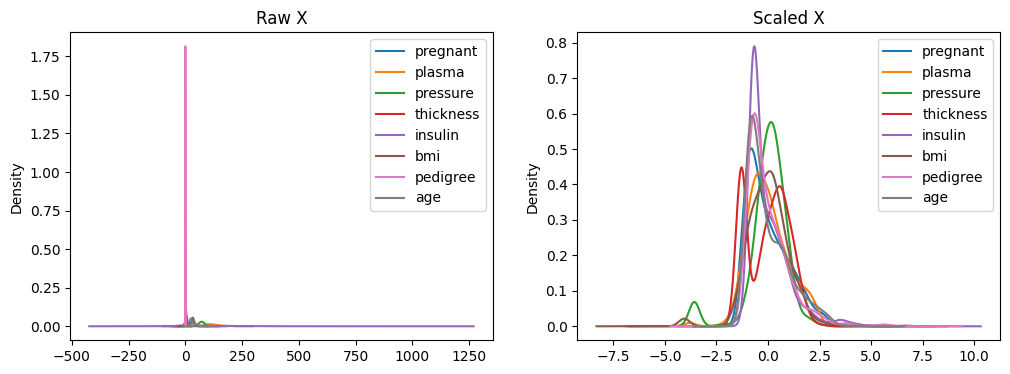

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)    ## a)데이터 전처리 

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw X', ax=ax[0])                         ## b)kde
scaled_X.plot(kind='kde', title='Scaled X', ax=ax[1])
plt.show()

# 학습셋과 테스트셋을 75:25의 비율로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [10]:
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [9]:
scaled_X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909
...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101


### 1. 결정 트리

In [24]:
# 결정 트리 분류기를 불러 옵니다.           
from sklearn.tree import DecisionTreeClassifier     

# 학습 환경을 설정합니다.
classifier= DecisionTreeClassifier()
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)                                                ## a) 교차검증

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)      ##  b) cross_val_score

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 59.51 %
Standard Deviation: 6.78 %


### 2. 랜덤 포레스트

In [30]:
# 랜덤 포레스트 분류기를 불러 옵니다.
from sklearn.ensemble import RandomForestClassifier         ## a) ensemble: 여러 머신러닝을 조합하여 더욱 강력한 모델을 만들때 
 
# 학습 환경을 설정합니다.
classifier= RandomForestClassifier(n_estimators = 50)       ## b) n_estimators = 50   <=>  결정트리 50개 존재
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)
print('y_pred:', y_pred)



# 계층별 교차 검증 환경을 설정합니다. 
skf1=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf1)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy1: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation1: {:.2f} %".format(accuracies1.std()*100))

print('-'*50)

skf2=StratifiedKFold(n_splits=100, shuffle=True)
accuracies2 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf2)

print("Accuracy2: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation2: {:.2f} %".format(accuracies2.std()*100))

y_pred: [1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 0]
Accuracy1: 59.38 %
Standard Deviation1: 4.51 %
--------------------------------------------------
Accuracy2: 60.47 %
Standard Deviation2: 20.11 %


In [31]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3. 가우시안 나이브 베이즈

In [4]:
# 가우시안 나이브 베이즈 분류기를 불러옵니다.
from sklearn.naive_bayes import GaussianNB

# 학습 환경을 설정합니다.
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.88 %
Standard Deviation: 4.29 %


### 4. K-최근접 이웃

In [32]:
#  K-최근접 이웃 분류기를 불러옵니다.
from sklearn.neighbors import KNeighborsClassifier

# 학습 환경을 설정합니다.
classifier = KNeighborsClassifier() 
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 66.86 %
Standard Deviation: 4.65 %


### 5. 에이다 부스트

In [6]:
# 에이다 부스트 분류기를 불러옵니다.
from sklearn.ensemble import AdaBoostClassifier

# 학습 환경을 설정합니다.
classifier = AdaBoostClassifier() 
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.36 %
Standard Deviation: 4.84 %


### 6. 이차 판별 분석

In [7]:
# 이차 판별 분석 분류기를 불러옵니다.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 학습 환경을 설정합니다.
classifier = QuadraticDiscriminantAnalysis() 
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.94 %
Standard Deviation: 8.03 %


### 7. 서포트 벡터 머신

In [8]:
# 서포트 벡터 머신 분류기를 불러옵니다.
from sklearn.svm import SVC

# 학습 환경을 설정합니다.
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.51 %
Standard Deviation: 3.58 %


### 8. 서포트 벡터 머신 - RBF 커널

In [9]:
# 서포트 벡터 머신 분류기를 불러옵니다.
from sklearn.svm import SVC

# 학습 환경을 설정합니다.
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.86 %
Standard Deviation: 3.37 %


### 9. 보팅

In [19]:
# 보팅 분류기를 불러옵니다.
from sklearn.ensemble import VotingClassifier

# 학습 환경을 설정합니다.
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel = 'linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.36 %
Standard Deviation: 3.87 %


### 10. 배깅

In [21]:
# 배깅 분류기를 불러옵니다.
from sklearn.ensemble import BaggingClassifier

# 학습 환경을 설정합니다.
classifier = BaggingClassifier(base_estimator=SVC(kernel = 'rbf'), n_estimators=10)
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf=StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.69 %
Standard Deviation: 3.15 %


### 여러 알고리즘 성능을 한눈에 비교하기

Mean accuracy of D_tree : 67.35 %
Mean accuracy of RF : 74.83 %
Mean accuracy of GNB : 75.00 %
Mean accuracy of KNN : 73.11 %
Mean accuracy of Ada : 75.88 %
Mean accuracy of QDA : 75.50 %
Mean accuracy of SVM_l : 72.58 %
Mean accuracy of SVM_k : 73.80 %
Mean accuracy of Voting : 74.30 %
Mean accuracy of Bagging : 74.82 %


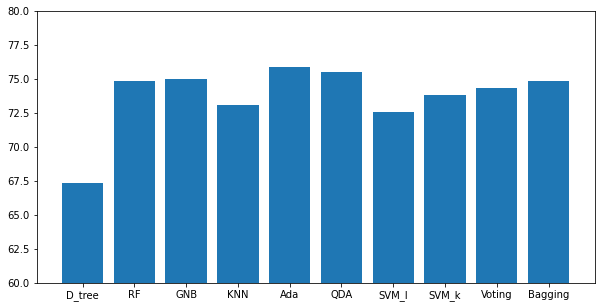

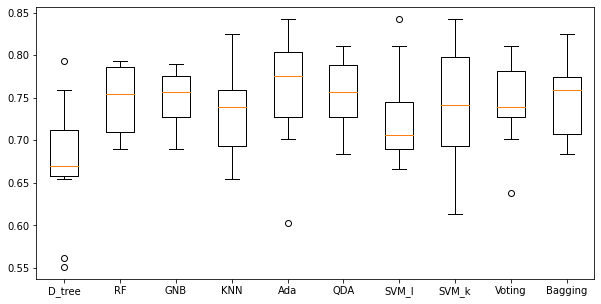

In [12]:
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()